In [9]:
# !pip install lightgbm
# !pip install xgboost
# !pip install missingno


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join


import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [101]:
df_m = pd.read_csv('../데이터전처리/pre_data/월별_통합_모델링용.csv',index_col=0)
df_d = pd.read_csv('../데이터전처리/pre_data/일별_통합_모델링용.csv',index_col=0)

In [93]:
# 월별 데이터
df_m.drop(columns='date',inplace=True)
df_m.tail()

,닭고기가격,병아리(원/수),hot_day,import amount,feedprice,oil_avg,도축,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
117,3505,312,3,9360,492.0,69.247955,89892,99247,26078,0.25,0.75
118,3074,408,0,9009,503.0,72.975152,81026,103039,26346,0.25,0.75
119,3913,447,0,12005,508.0,82.193333,81228,110791,25977,0.25,0.75
120,2985,315,0,10025,520.0,79.858712,86819,107207,25217,0.25,1.00
121,3320,273,0,11293,511.0,73.308986,90151,108714,27036,0.25,1.00


In [27]:
# 일별 데이터
df_d.drop(columns='date',inplace=True)
df_d.tail()

KeyError: "['date'] not found in axis"

# Gradient Boosting Regression

## LightGBM

### 월별

In [33]:
X = df_m.drop(columns='닭고기가격')
y = df_m['닭고기가격']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
LGBM_model = LGBMRegressor(n_estimators=30,learning_rate=0.12)
LGBM_model.fit(X_train,y_train)
train_error = mse(y_train, LGBM_model.predict(X_train))
test_error = mse(y_test, LGBM_model.predict(X_test))
print('LGBM test error : ', test_error)
print('LGBM overfit ratio : ', test_error/train_error)
# print('predict : ', LGBM_model.predict(X_test))
print('score : ',LGBM_model.score(X_test, y_test))

LGBM test error :  56615.464640954975
LGBM overfit ratio :  1.404923802045862
score :  0.7738751755430419


In [67]:
LGBM_cross_score = cross_val_score(LGBM_model,X,y,cv=5)
print('LGBM 월별 교차 검증별 정확도 : {}'.format(np.round(LGBM_cross_score,4)))

LGBM 월별 교차 검증별 정확도 : [ 1.3260e-01 -7.6000e-02 -1.5000e-03 -1.7808e+00 -6.2300e-02]


### 일별

In [49]:
X_daily = df_d.drop(columns='price')
y_daily = df_d['price']

Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_daily,y_daily,test_size=0.3,random_state=42)

In [56]:
LGBM_model_d = LGBMRegressor(n_estimators=30,learning_rate=0.12)
LGBM_model_d.fit(Xd_train,yd_train)
train_error = mse(yd_train, LGBM_model_d.predict(Xd_train))
test_error = mse(yd_test, LGBM_model_d.predict(Xd_test))
print('LGBM test error : ', test_error)
print('LGBM overfit ratio : ', test_error/train_error)
# print('predict : ', LGBM_model_d.predict(X_test))
print('score : ',LGBM_model_d.score(X_test, y_test))

LGBM test error :  56615.464640954975
LGBM overfit ratio :  1.404923802045862
score :  0.7738751755430419


In [68]:
LGBM_cross_score_d = cross_val_score(LGBM_model_d,X,y,cv=5)
print('LGBM 일별 교차 검증별 정확도 : {}'.format(np.round(LGBM_cross_score_d,4)))

LGBM 일별 교차 검증별 정확도 : [ 1.3260e-01 -7.6000e-02 -1.5000e-03 -1.7808e+00 -6.2300e-02]


## XGBOOST

In [57]:
# 월별 데이터
XG_model = xgb.XGBRegressor()
XG_model.fit(X_train, y_train)
train_error = mse(y_train, XG_model.predict(X_train))
test_error = mse(y_test, XG_model.predict(X_test))
print('XG_model test error : ', test_error)
print('XG_model overfit ratio : ', test_error/train_error)
# print('predict : ', XG_model.predict(X_test))
print('score : ',XG_model.score(X_test, y_test))

XG_model test error :  37236.90723825873
XG_model overfit ratio :  8.468632279785783
score :  0.8512740438328891


In [70]:
XG_cross_score = cross_val_score(XG_model,X,y,cv=5)
print('XG 월별 교차 검증별 정확도 : {}'.format(np.round(XG_cross_score,4)))

XG 월별 교차 검증별 정확도 : [-0.2151 -0.3743  0.1757 -1.1322 -0.1165]


In [58]:
# 일별 데이터
XG_model_d = xgb.XGBRegressor()
XG_model_d.fit(Xd_train, yd_train)
train_error = mse(yd_train, XG_model_d.predict(Xd_train))
test_error = mse(yd_test, XG_model_d.predict(Xd_test))
print('XG_model test error : ', test_error)
print('XG_model overfit ratio : ', test_error/train_error)
# print('predict : ', XG_model_d.predict(X_test))
print('score : ',XG_model_d.score(X_test, y_test))

XG_model test error :  37236.90723825873
XG_model overfit ratio :  8.468632279785783
score :  0.8512740438328891


In [72]:
XG_cross_score_d = cross_val_score(XG_model_d,X,y,cv=5)
print('XG 일별 교차 검증별 정확도 : {}'.format(np.round(XG_cross_score_d,4)))

XG 일별 교차 검증별 정확도 : [-0.2151 -0.3743  0.1757 -1.1322 -0.1165]


## Gradient Boosting

In [59]:
# 월별 데이터
GB_model = GradientBoostingRegressor()
GB_model.fit(X,y)
train_error = mse(y_train, GB_model.predict(X_train))
test_error = mse(y_test, GB_model.predict(X_test))
print('GB_model test error : ', test_error)
print('GB_model overfit ratio : ', test_error/train_error)
# print('predict : ', GB_model.predict(X_test))
print('score : ',GB_model.score(X_test, y_test))

GB_model test error :  71689.56933802097
GB_model overfit ratio :  1.0061047683469675
score :  0.7136684934980077


In [73]:
GB_cross_score = cross_val_score(GB_model,X,y,cv=5)
print('XG 월별 교차 검증별 정확도 : {}'.format(np.round(GB_cross_score,4)))

XG 월별 교차 검증별 정확도 : [ 0.1581  0.0709  0.1085 -0.4524 -0.001 ]


In [60]:
# 일별 데이터
GB_model_d = GradientBoostingRegressor()
GB_model_d.fit(X_daily,y_daily)
train_error = mse(y_train, GB_model_d.predict(X_train))
test_error = mse(y_test, GB_model_d.predict(X_test))
print('GB_model test error : ', test_error)
print('GB_model overfit ratio : ', test_error/train_error)
# print('predict : ', GB_model_d.predict(X_test))
print('score : ',GB_model_d.score(X_test, y_test))


GB_model test error :  71689.56933802097
GB_model overfit ratio :  1.006104768346967
score :  0.7136684934980075


In [74]:
GB_cross_score_d = cross_val_score(GB_model_d,X,y,cv=5)
print('XG 월별 교차 검증별 정확도 : {}'.format(np.round(GB_cross_score_d,4)))

XG 월별 교차 검증별 정확도 : [ 0.1585  0.0772  0.1072 -0.46   -0.001 ]


# LSTM

In [72]:
df_d.drop(columns='date',inplace=True)
df_d.columns

Index(['price', '병아리(원/수)', 'oil_avg', '소_소비자가_int', '돼지_소비자가_int', '미국기준금리',
       '한국기준금리'],
      dtype='object')

In [76]:
# 일별
from sklearn.preprocessing import MinMaxScaler

df_d.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['price', '병아리(원/수)', 'oil_avg', '소_소비자가_int', '돼지_소비자가_int', '미국기준금리',
       '한국기준금리']
data_scaled = scaler.fit_transform(df_d[scale_cols])
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = scale_cols


# pred_2022_J = scaler.fit_transform(3934, 85,107800, 26170, 0.25, 1.0)

In [77]:
data_scaled

,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,0.764479,0.375,0.634319,0.984098,0.890370,0.000000,0.181818
1,0.764479,0.375,0.644175,0.984098,0.898646,0.000000,0.181818
2,0.705792,0.375,0.641740,0.989602,0.950985,0.000000,0.181818
3,0.705792,0.375,0.637986,0.979407,0.952576,0.000000,0.181818
4,0.647104,0.375,0.632829,0.964919,0.954592,0.000000,0.181818
...,...,...,...,...,...,...,...
2991,0.424324,0.125,0.904877,0.515743,0.692082,0.222222,1.000000
2992,0.405792,0.125,0.905564,0.520071,0.701277,0.222222,1.000000
2993,0.405792,0.250,0.907369,0.545072,0.717898,0.222222,1.000000
2994,0.405792,0.250,0.894734,0.539153,0.718959,0.222222,1.000000


In [53]:
data_scaled.head()
data_scaled.shape

(2996, 7)

In [54]:
TEST_SIZE = 60
WINDOW_SIZE = 20

train = data_scaled[:-TEST_SIZE]
test = data_scaled[-TEST_SIZE:]

In [55]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [56]:
from sklearn.model_selection import train_test_split

feature_cols = ['병아리(원/수)', 'oil_avg', '소_소비자가_int', '돼지_소비자가_int', '미국기준금리',
       '한국기준금리']
label_cols = ['price']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size= .80)
x_train.shape, x_valid.shape

((583, 20, 6), (2333, 20, 6))

In [57]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((60, 6), (60, 1))

In [58]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape


((40, 20, 6), (40, 1))

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM



model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [66]:
import os

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])


Epoch 1/200
37/37 [==============================] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 1: val_loss improved from inf to 0.01788, saving model to model\tmp_checkpoint.h5
37/37 [==============================] - 2s 22ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 2/200
31/37 [========================>.....] - ETA: 0s - loss: 0.0170 - mse: 0.0170
Epoch 2: val_loss improved from 0.01788 to 0.01778, saving model to model\tmp_checkpoint.h5
37/37 [==============================] - 1s 17ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 3/200
30/37 [=======================>......] - ETA: 0s - loss: 0.0169 - mse: 0.0169
Epoch 3: val_loss did not improve from 0.01778
37/37 [==============================] - 1s 17ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 4/200
35/37 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 4: val_loss improved from 0.01778 to 0.01765, s

ValueError: in user code:

    File "C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 20, 6), found shape=(None, 6)


In [36]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

2/2 [==============================] - 0s 4ms/step


(40, 1)

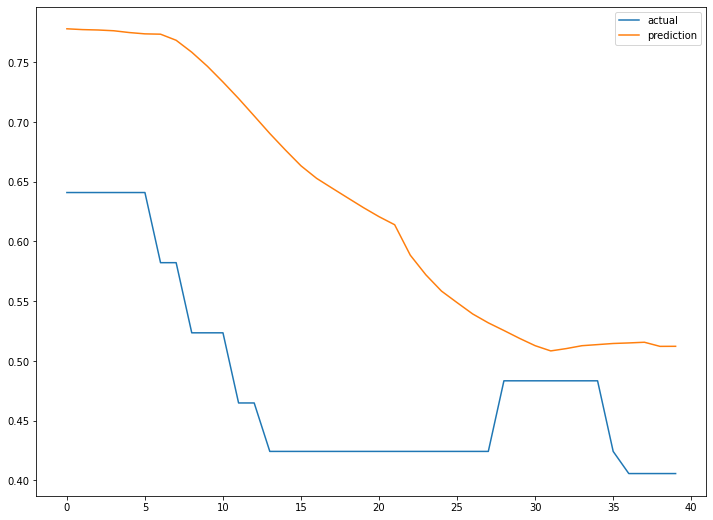

In [37]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

# LSTM 수정

In [137]:
from tqdm import trange
import random
from torch import nn
from torch import optim

In [128]:
min_max_scaler = MinMaxScaler()
df_d['price'] = min_max_scaler.fit_transform(df_d['price'].to_numpy().reshape(-1,1))

In [129]:
train = df_d[:-30]
train = train['price'].to_numpy()

test = df_d[-30:]
test = test['price'].to_numpy()

In [130]:
from torch.utils.data import DataLoader, Dataset

class windowDataset(Dataset):
    def __init__(self, y, input_window, output_window, stride=1):
        #총 데이터의 개수
        L = y.shape[0]
        #stride씩 움직일 때 생기는 총 sample의 개수
        num_samples = (L - input_window - output_window) // stride + 1

        #input과 output : shape = (window 크기, sample 개수)
        X = np.zeros([input_window, num_samples])
        Y = np.zeros([output_window, num_samples])

        for i in np.arange(num_samples):
            start_x = stride*i
            end_x = start_x + input_window
            X[:,i] = y[start_x:end_x]

            start_y = stride*i + input_window
            end_y = start_y + output_window
            Y[:,i] = y[start_y:end_y]

        X = X.reshape(X.shape[0], X.shape[1], 1).transpose((1,0,2))
        Y = Y.reshape(Y.shape[0], Y.shape[1], 1).transpose((1,0,2))
        self.x = X
        self.y = Y
        
        self.len = len(X)
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    def __len__(self):
        return self.len

In [131]:
iw = 60
ow = 30

train_dataset = windowDataset(train, input_window=iw, output_window=ow, stride=1)
train_loader = DataLoader(train_dataset, batch_size=64)


In [132]:
class lstm_encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers = 1):
        super(lstm_encoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first=True)

    def forward(self, x_input):
        lstm_out, self.hidden = self.lstm(x_input)
        return lstm_out, self.hidden

In [133]:
class lstm_decoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers = 1):
        super(lstm_decoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,num_layers = num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, input_size)           

    def forward(self, x_input, encoder_hidden_states):
        lstm_out, self.hidden = self.lstm(x_input.unsqueeze(-1), encoder_hidden_states)
        output = self.linear(lstm_out)
        
        return output, self.hidden

In [134]:
class lstm_encoder_decoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(lstm_encoder_decoder, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        self.encoder = lstm_encoder(input_size = input_size, hidden_size = hidden_size)
        self.decoder = lstm_decoder(input_size = input_size, hidden_size = hidden_size)

    def forward(self, inputs, targets, target_len, teacher_forcing_ratio):
        batch_size = inputs.shape[0]
        input_size = inputs.shape[2]

        outputs = torch.zeros(batch_size, target_len, input_size)

        _, hidden = self.encoder(inputs)
        decoder_input = inputs[:,-1, :]
        
        #원하는 길이가 될 때까지 decoder를 실행한다.
        for t in range(target_len): 
            out, hidden = self.decoder(decoder_input, hidden)
            out =  out.squeeze(1)
            
            # teacher forcing을 구현한다.
            # teacher forcing에 해당하면 다음 인풋값으로는 예측한 값이 아니라 실제 값을 사용한다.
            if random.random() < teacher_forcing_ratio:
                decoder_input = targets[:, t, :]
            else:
                decoder_input = out
            outputs[:,t,:] = out

        return outputs
	
    # 편의성을 위해 예측해주는 함수도 생성한다.
    def predict(self, inputs, target_len):
        self.eval()
        inputs = inputs.unsqueeze(0)
        batch_size = inputs.shape[0]
        input_size = inputs.shape[2]
        outputs = torch.zeros(batch_size, target_len, input_size)
        _, hidden = self.encoder(inputs)
        decoder_input = inputs[:,-1, :]
        for t in range(target_len): 
            out, hidden = self.decoder(decoder_input, hidden)
            out =  out.squeeze(1)
            decoder_input = out
            outputs[:,t,:] = out
        return outputs.detach().numpy()[0,:,0]

In [135]:
model = lstm_encoder_decoder(input_size=1, hidden_size=16)

In [138]:
learning_rate=0.01
epoch = 3000
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

In [141]:
from tqdm import tqdm

model.train()
with tqdm(range(epoch)) as tr:
    for i in tr:
        total_loss = 0.0
        for x,y in train_loader:
            optimizer.zero_grad()
            x = x.float()
            y = y.float()
            output = model(x, y, ow, 0.6)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.cpu().item()
        tr.set_postfix(loss="{0:.5f}".format(total_loss/len(train_loader)))

 15%|█▌        | 453/3000 [22:16<2:05:16,  2.95s/it, loss=0.00262]


KeyboardInterrupt: 

# Neural prophet

In [38]:
# !pip install neuralprophet


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     -------------------------------------- 104.0/104.0 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 134.4/134.4 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 16.2 MB/s eta 0:00:00
     ------------------------------------- 384.1/384.1 kB 12.1 MB/s eta 0:00:00


In [39]:
from neuralprophet import NeuralProphet

In [40]:
df_d

,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,4047,400,76.703333,111396,25177,0.25,1.00
1,4047,400,77.850000,111396,25411,0.25,1.00
2,3895,400,77.566667,112019,26891,0.25,1.00
3,3895,400,77.130000,110865,26936,0.25,1.00
4,3743,400,76.530000,109225,26993,0.25,1.00
...,...,...,...,...,...,...,...
2991,3166,200,108.180000,58380,19570,0.75,3.25
2992,3118,200,108.260000,58870,19830,0.75,3.25
2993,3118,300,108.470000,61700,20300,0.75,3.25
2994,3118,300,107.000000,61030,20330,0.75,3.25


In [41]:
df_d = pd.read_csv('../데이터전처리/pre_data/일별_통합_모델링용.csv',index_col=0)

cutoff = "2019-01-01"
train_df = df_d[df_d['date']<cutoff]
test_df = df_d[df_d['date']>=cutoff]

In [45]:
train = pd.DataFrame({'ds' : train_df['date'], 'y' : train_df['price']})
test = pd.DataFrame({'ds' : test_df['date'], 'y' : test_df['price']})

In [46]:
NProphet = NeuralProphet(learning_rate=0.1)
metrics = NProphet.fit(train, freq='H')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 80.657% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 156
Epoch[156/156]: 100%|██████████| 156/156 [00:24<00:00,  6.48it/s, SmoothL1Loss=0.0187, MAE=287, RMSE=367, Loss=0.0158, RegLoss=0]  


INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 80.657% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency -1D
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 80.657% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


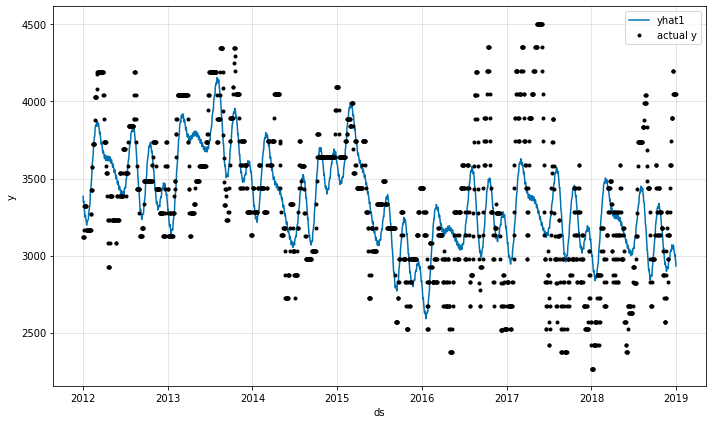

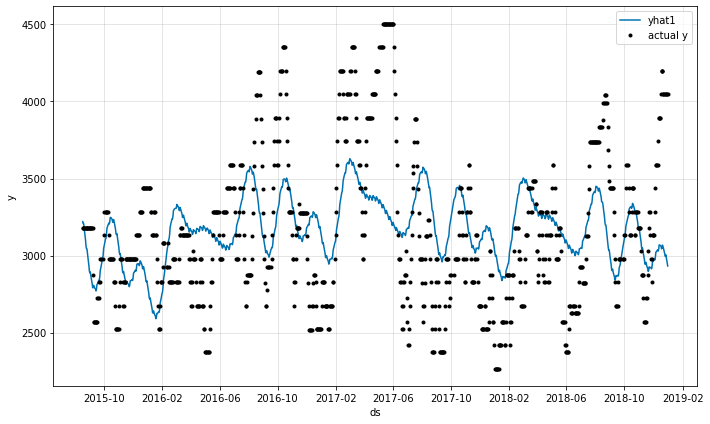

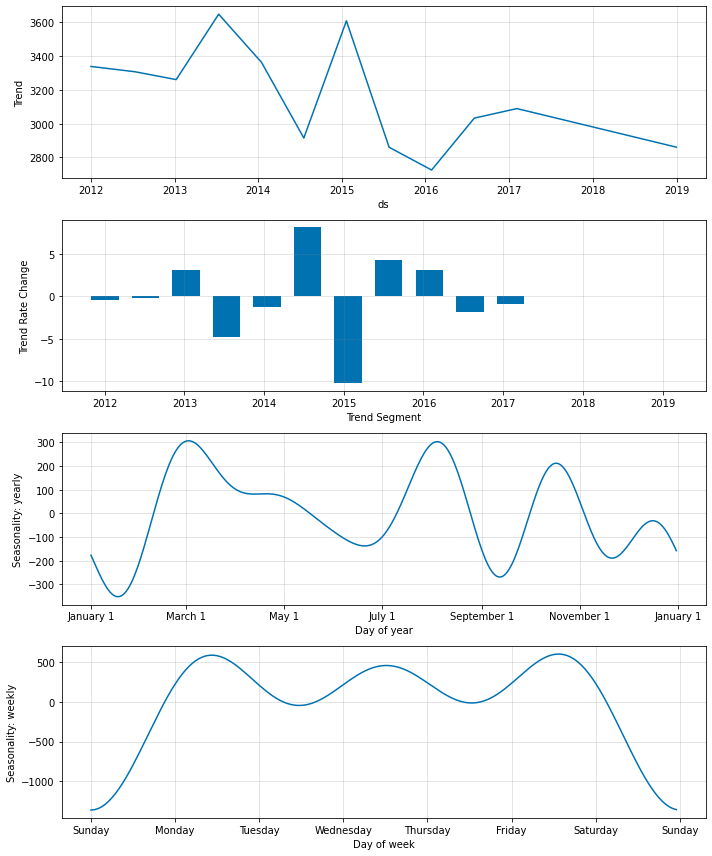

In [47]:
#학습 데이터셋 예측 결과 시각화
train_pred = NProphet.predict(train)
#fig = m.plot(train_pred)
fig1 = NProphet.plot(train_pred[-30*24*6:])
fig2 = NProphet.plot(train_pred[-7*24*6:])
#comp = m.plot_components(train_pred)
param = NProphet.plot_parameters()

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 80.825% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency -1D
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 80.825% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


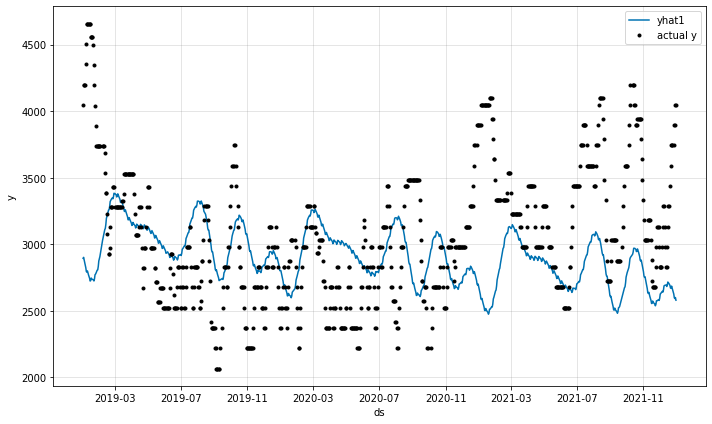

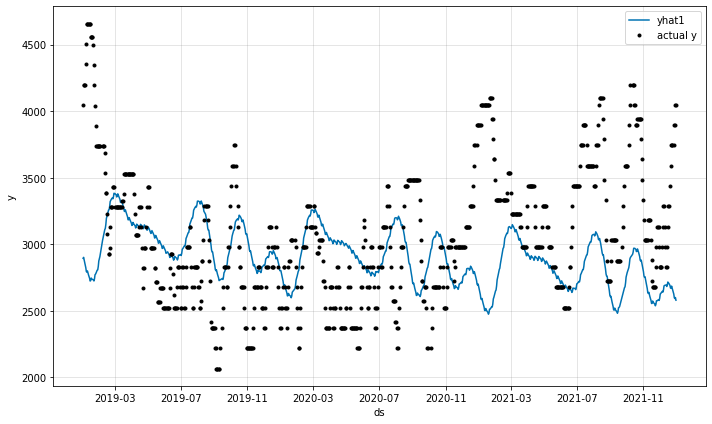

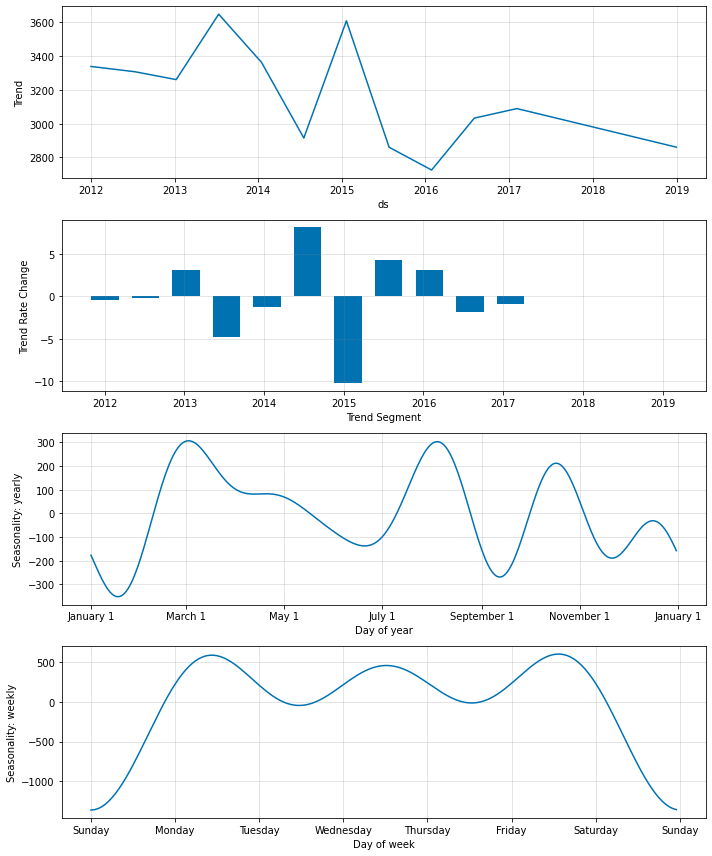

In [48]:
#테스트 데이터셋 예측 결과 시각화
test_pred = NProphet.predict(test)
#fig = m.plot(test_pred)
fig1 = NProphet.plot(test_pred[-14*24*6:])
fig2 = NProphet.plot(test_pred[-7*24*6:])
#comp = m.plot_components(test_pred)
param = NProphet.plot_parameters()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

col = "price"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**2)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== price Evaluate Result============
MAE : 286.8120981391809
MSE : 138635.14157349587
RMSE : 19219702479.103245
MAPE : 0.08667083722040834


In [50]:
#테스트 데이터셋 검증
pred2 = test_pred["y"]
test2 = test_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**2)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== price Evaluate Result============
MAE : 440.30719885512474
MSE : 339801.80048670946
RMSE : 115465263614.0095
MAPE : 0.15487192438803707
